In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [6]:
transaction = pd.read_excel('kpmg.xlsx', sheet_name = 'Transactions')

customer = pd.read_excel('kpmg.xlsx', sheet_name = 'CustomerDemographic')

address = pd.read_excel('kpmg.xlsx', sheet_name = 'CustomerAddress')

# Clean the dataset

In [7]:
transaction.columns =[transaction.iloc[0][x] for x in range(transaction.shape[1])]

transaction.drop([0], inplace = True)

customer.columns =[customer.iloc[0][x] for x in range(customer.shape[1])]

customer.drop([0], inplace = True)

address.columns =[address.iloc[0][x] for x in range(address.shape[1])]

address.drop([0], inplace = True)

# Exploring the customer dataset

In [8]:
customer.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


### the default column is something gibberish

In [9]:
customer.drop(columns = ['default'], inplace = True)

In [10]:
customer['first_name'][customer['first_name'].str.contains('-')]
### in first name there should be 1 name only. why include middle name or other person name here?

5       Sheila-kathryn
1012        Anna-diane
1035         Kara-lynn
1271           Jo-anne
1711      Marie-jeanne
1751          Sara-ann
1788        Anna-diana
1860        Holly-anne
2568        Anna-diana
2747        Anna-diane
2997            Jo-ann
3444         Kara-lynn
3860    Sheila-kathryn
Name: first_name, dtype: object

In [11]:
customer['first_name'][customer['first_name'].str.contains(' ')]
### in one name there is also a space

2250    De witt
Name: first_name, dtype: object

In [12]:
customer['first_name'][customer['first_name'].str.endswith(' ')]

Series([], Name: first_name, dtype: object)

In [13]:
customer['first_name'][customer['first_name'].str.endswith(',')]

Series([], Name: first_name, dtype: object)

In [14]:
customer[customer['last_name'].isnull()].shape
## 125 customers are there missing last name value

(125, 12)

In [15]:
customer['gender'].value_counts(dropna = False)

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

#### there should be consistent data entry. here M, F, Femal, Female, and Male is there. What is U? give proper full form or provide a dropdown option

In [23]:
# Cleaning the customer gender column
customer['gender'].replace({'M':'Male', 'F':'Female','Femal':'Female', 'U':'unknown'}, inplace = True)


In [25]:
customer['gender'].value_counts(dropna = False)

Female     2039
Male       1873
unknown      88
Name: gender, dtype: int64

In [26]:
# for furhtur analysis removing the first_name and last_name from the customer table
customer.drop(columns = ['first_name', 'last_name'], inplace = True)

In [27]:
customer.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,1,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11
2,2,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16
3,3,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15
4,4,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7
5,5,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8


## Exploring the customers with unknown gender

In [35]:
unk_gender_cust = customer[customer['gender'] == 'unknown']
unk_gender_cust.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
34,34,unknown,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20
144,144,unknown,71,NaN,Environmental Tech,IT,Mass Customer,N,No,NaN
168,168,unknown,8,NaN,General Manager,IT,Affluent Customer,N,Yes,NaN
267,267,unknown,53,NaN,NaN,IT,High Net Worth,N,No,NaN
290,290,unknown,42,NaN,Senior Sales Associate,IT,Mass Customer,N,No,NaN


In [36]:
unk_gender_cust.shape

(88, 10)

##### There are 88 customer_id where there is no gender mentioned.

##### Out of all 88, one customer_id, i.e. id = 34 have an age of 2023-1843 = 180 years. This is suspicious. rest 87 have not mentioned their DOB. Tenure is also missing for these 87 customers

In [39]:
unk_gender_cust['job_industry_category'].value_counts()

IT                    72
Financial Services     7
Health                 6
Manufacturing          3
Name: job_industry_category, dtype: int64

##### Majorly all of them works in IT industry

In [42]:
unk_gender_cust['wealth_segment'].value_counts()

Mass Customer        46
High Net Worth       25
Affluent Customer    17
Name: wealth_segment, dtype: int64

In [43]:
unk_gender_cust['owns_car'].value_counts()

Yes    50
No     38
Name: owns_car, dtype: int64

In [47]:
unk_gender_cust['deceased_indicator'].value_counts()

N    88
Name: deceased_indicator, dtype: int64


# Back to customers table


In [52]:
customer['customer_id'].nunique()

4000

In [54]:
customer['DOB'] = pd.to_datetime(customer['DOB'])
customer.head(5)

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11
2,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16
3,3,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15
4,4,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7
5,5,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8


In [56]:
customer['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

##### Deceased means 'not living'. I assume the fact to be true and remove those customers who are not present on the earth

In [63]:
customer.drop(customer[customer['deceased_indicator'] == 'Y']['customer_id'].values, inplace = True)
#  Now we have demographic data for 3998 customers only

In [69]:
customer['age'] = 2023 - customer['DOB'].dt.year
customer.drop(columns = ['DOB'],inplace = True)

#  creating a new age column and deleting the DOB column

customer.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
1,1,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11,70.0
2,2,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,43.0
3,3,Male,61,Recruiting Manager,Property,Mass Customer,N,Yes,15,69.0
4,4,Male,33,NaN,IT,Mass Customer,N,No,7,62.0
5,5,Female,56,Senior Editor,NaN,Affluent Customer,N,Yes,8,46.0


In [76]:
customer.drop(columns = ['deceased_indicator'], inplace = True)
#  dropping the deceased_indicator column

In [73]:
customer['past_3_years_bike_related_purchases'] = pd.to_numeric(customer['past_3_years_bike_related_purchases'])
# converting data type from object to numeric value

In [79]:
customer['customer_id'] = pd.to_numeric(customer['customer_id'])
customer['tenure'] = pd.to_numeric(customer['tenure'])
# converting data type of columns to numeric

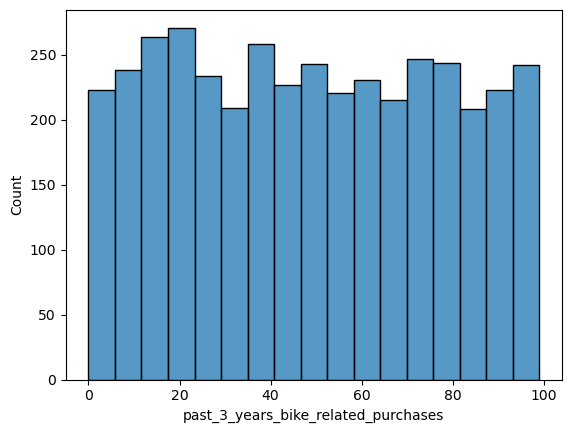

In [84]:
sbn.histplot(customer['past_3_years_bike_related_purchases'])
plt.show()

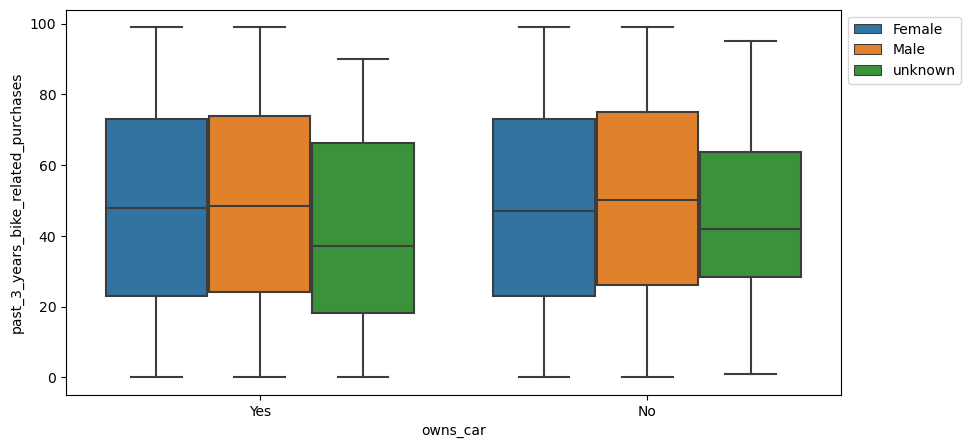

In [106]:
plt.figure(figsize = (10,5))
sbn.boxplot(x = customer['owns_car'], y = customer['past_3_years_bike_related_purchases'], hue = customer['gender'])
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

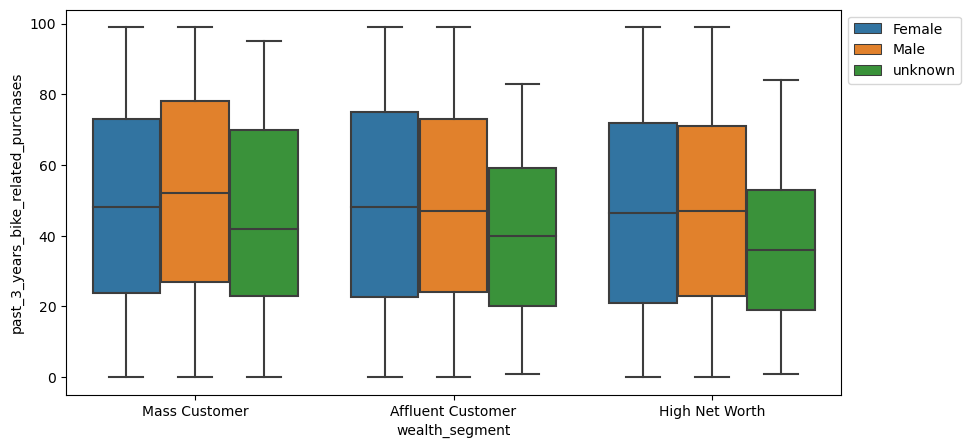

In [105]:
plt.figure(figsize = (10,5))
sbn.boxplot(x = customer['wealth_segment'], y = customer['past_3_years_bike_related_purchases'], hue = customer['gender'])
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

In [97]:
customer['purc/tenure'] = customer['past_3_years_bike_related_purchases']/ customer['tenure']

In [98]:
customer.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,purc/tenure
1,1,Female,93,Executive Secretary,Health,Mass Customer,Yes,11.0,70.0,8.454545
2,2,Male,81,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,43.0,5.062500
3,3,Male,61,Recruiting Manager,Property,Mass Customer,Yes,15.0,69.0,4.066667
4,4,Male,33,NaN,IT,Mass Customer,No,7.0,62.0,4.714286
5,5,Female,56,Senior Editor,NaN,Affluent Customer,Yes,8.0,46.0,7.000000


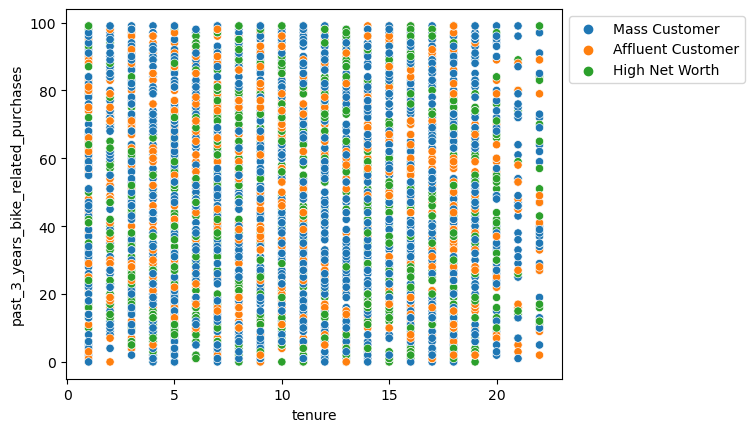

In [104]:
sbn.scatterplot(x=customer['tenure'], y = customer['past_3_years_bike_related_purchases'], hue = customer['wealth_segment'])
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

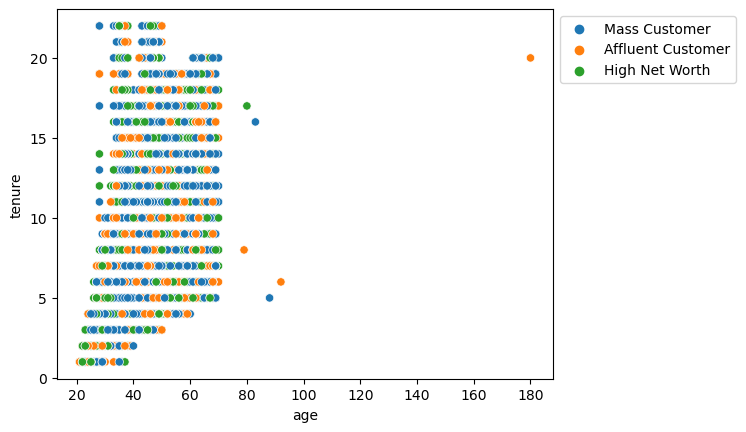

In [107]:
sbn.scatterplot(x=customer['age'], y = customer['tenure'], hue = customer['wealth_segment'])
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

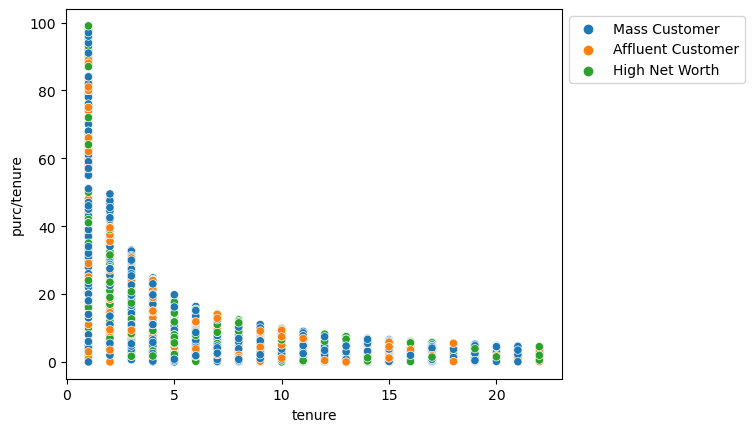

In [120]:
sbn.scatterplot(x=customer['tenure'], y = (customer['purc/tenure']), hue = customer['wealth_segment'])
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

#### Interesting ! this feature purchase/tenure might be helpful. it signifies that as tenure increases, bike related purchases drops drastically at first and then remains somewhat constant

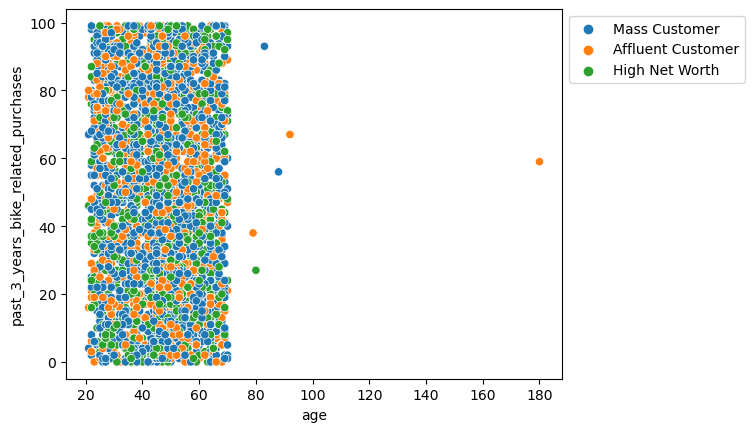

In [112]:
sbn.scatterplot(x=customer['age'], y = customer['past_3_years_bike_related_purchases'], hue = customer['wealth_segment'])
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

In [122]:
def new_feature(x):
    if 20 <= x<= 29:
        return '20s'
    elif 30 <= x <= 39:
        return '30s'
    elif 40 <= x <= 49:
        return '40s'
    elif 50<= x <=59:
        return '50s'
    else:
        return '60+'
    
customer['age_bkt'] = customer['age'].apply(new_feature)

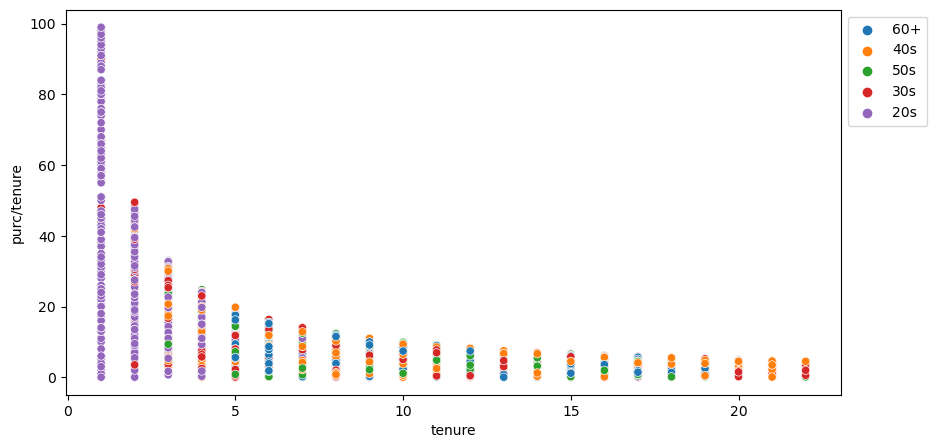

In [125]:
plt.figure(figsize= (10,5))
sbn.scatterplot(x=customer['tenure'], y = (customer['purc/tenure']), hue = customer['age_bkt'])
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

##### Customers in their 20s and few in 30s,40s and 50s, having current tenure less than 5 years, tend to have high purchase of bike related accessories. maybe because they have bike at their early stage of carrier

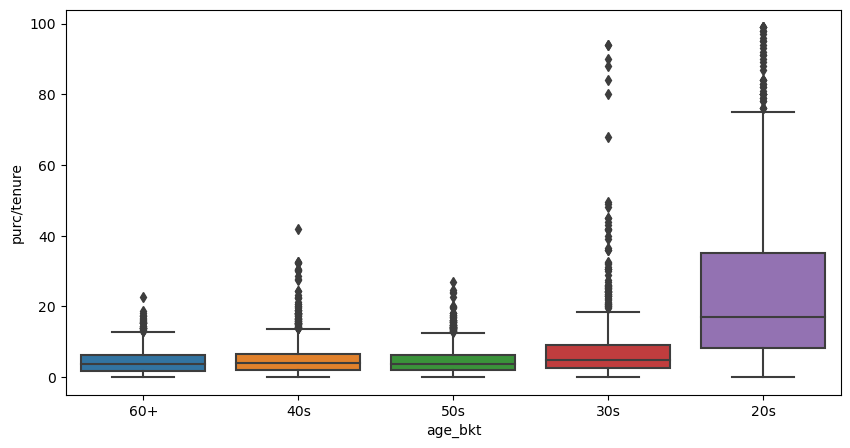

In [129]:
plt.figure(figsize= (10,5))
sbn.boxplot(x=customer['age_bkt'], y = (customer['purc/tenure']))
# plt.legend(loc = 'upper left')
plt.show()

# Exploring Address dataset

In [157]:
address.head()

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9


In [158]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


In [159]:
address['customer_id'] = pd.to_numeric(address['customer_id'])
# address['postcode'] = pd.to_numeric(address['postcode'])
# address['property_valuation'] = pd.to_numeric(address['property_valuation'])

In [160]:
address.drop(columns = ['country'], inplace = True)

In [161]:
address['state'].replace({'New South Wales':'NSW', 'Victoria':'VIC'}, inplace =True)

In [162]:
address.head()

,customer_id,address,postcode,state,property_valuation
1,1,060 Morning Avenue,2016,NSW,10
2,2,6 Meadow Vale Court,2153,NSW,10
3,4,0 Holy Cross Court,4211,QLD,9
4,5,17979 Del Mar Point,2448,NSW,4
5,6,9 Oakridge Court,3216,VIC,9


# Merging customer demographic with address dataset

In [163]:
s1 = set(customer['customer_id'].values)
s2 = set(address['customer_id'].values)

In [164]:
s1.difference(s2)

{3, 10, 22, 23}

In [165]:
# After merge i will have customer data for 3994 (3998-4) customers only

In [166]:
cust_dem_add = customer.merge(address, how = 'inner', on = 'customer_id')

In [171]:
cust_dem_add.drop(columns = ['address'], inplace = True)
# i dont know a customers daily travel so no need of his home address as of now. so removing the column

In [172]:
cust_dem_add.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,purc/tenure,age_bkt,postcode,state,property_valuation
0,1,Female,93,Executive Secretary,Health,Mass Customer,Yes,11.0,70.0,8.454545,60+,2016,NSW,10
1,2,Male,81,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,43.0,5.062500,40s,2153,NSW,10
2,4,Male,33,NaN,IT,Mass Customer,No,7.0,62.0,4.714286,60+,4211,QLD,9
3,5,Female,56,Senior Editor,NaN,Affluent Customer,Yes,8.0,46.0,7.000000,40s,2448,NSW,4
4,6,Male,35,NaN,Retail,High Net Worth,Yes,13.0,57.0,2.692308,50s,3216,VIC,9


In [199]:
new_cust_dem_add = cust_dem_add[cust_dem_add['gender'] != 'unknown']

In [200]:
new_cust_dem_add = new_cust_dem_add.drop(columns = ['job_title','job_industry_category'])

In [206]:
new_cust_dem_add['pur/age'] = new_cust_dem_add['past_3_years_bike_related_purchases']/new_cust_dem_add['age']

In [207]:
new_cust_dem_add.head()

,customer_id,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,age,purc/tenure,age_bkt,postcode,state,property_valuation,pur/age
0,1,Female,93,Mass Customer,Yes,11.0,70.0,8.454545,60+,2016,NSW,10,1.328571
1,2,Male,81,Mass Customer,Yes,16.0,43.0,5.062500,40s,2153,NSW,10,1.883721
2,4,Male,33,Mass Customer,No,7.0,62.0,4.714286,60+,4211,QLD,9,0.532258
3,5,Female,56,Affluent Customer,Yes,8.0,46.0,7.000000,40s,2448,NSW,4,1.217391
4,6,Male,35,High Net Worth,Yes,13.0,57.0,2.692308,50s,3216,VIC,9,0.614035


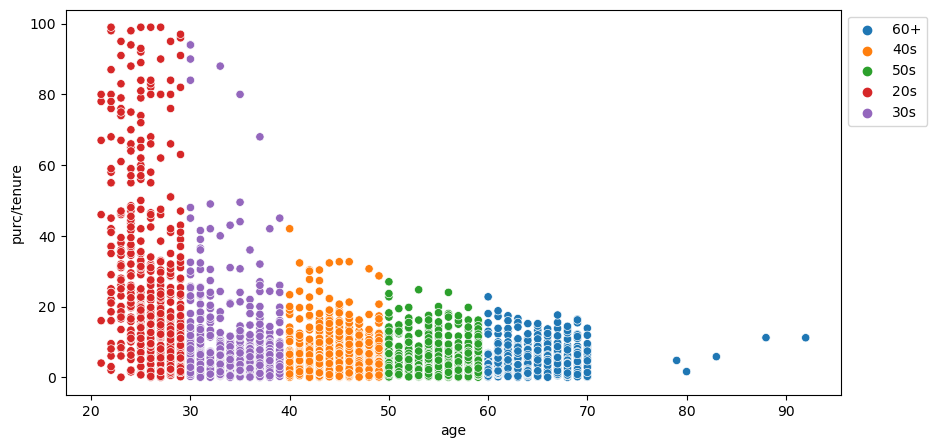

In [210]:
plt.figure(figsize= (10,5))
sbn.scatterplot(x=new_cust_dem_add['age'], y = (new_cust_dem_add['purc/tenure']), hue = new_cust_dem_add['age_bkt'])
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

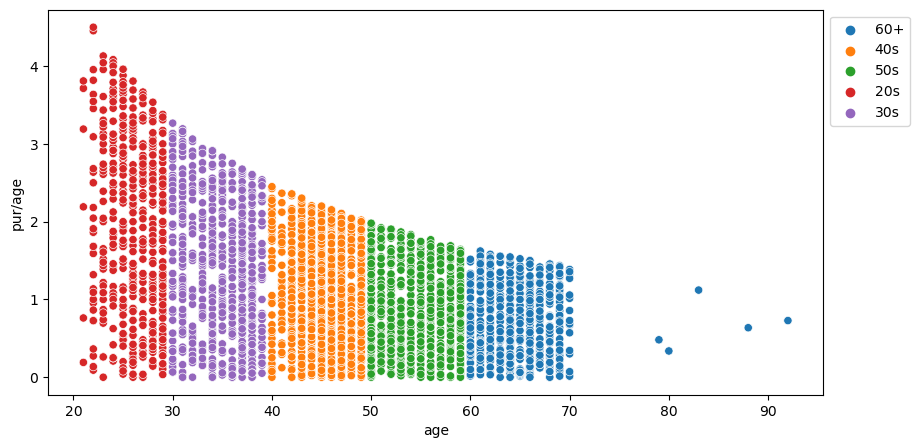

In [214]:
plt.figure(figsize= (10,5))
sbn.scatterplot(x=new_cust_dem_add['age'], y = (new_cust_dem_add['pur/age']), hue = new_cust_dem_add['age_bkt'])
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

In [216]:
new_cust_dem_add.head()

,customer_id,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,age,purc/tenure,age_bkt,postcode,state,property_valuation,pur/age
0,1,Female,93,Mass Customer,Yes,11.0,70.0,8.454545,60+,2016,NSW,10,1.328571
1,2,Male,81,Mass Customer,Yes,16.0,43.0,5.062500,40s,2153,NSW,10,1.883721
2,4,Male,33,Mass Customer,No,7.0,62.0,4.714286,60+,4211,QLD,9,0.532258
3,5,Female,56,Affluent Customer,Yes,8.0,46.0,7.000000,40s,2448,NSW,4,1.217391
4,6,Male,35,High Net Worth,Yes,13.0,57.0,2.692308,50s,3216,VIC,9,0.614035


# Exploring transaction dataset

In [382]:
transaction

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [383]:
# i am removing the transaction_date and product_first_sold_date columns

In [384]:
transaction = transaction.drop(columns = ['transaction_date','product_first_sold_date'])

In [385]:
transaction.head()

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
1,1,2,2950,False,Approved,Solex,Standard,medium,medium,71.49,53.62
2,2,3,3120,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92
3,3,37,402,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82
4,4,88,3135,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1
5,5,78,787,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48


In [387]:
transaction['transaction_id'] = pd.to_numeric(transaction['transaction_id'])
transaction['product_id'] = pd.to_numeric(transaction['product_id'])
transaction['customer_id'] = pd.to_numeric(transaction['customer_id'])
transaction['list_price'] = pd.to_numeric(transaction['list_price'])
transaction['standard_cost'] = pd.to_numeric(transaction['standard_cost'])


In [388]:
transaction = transaction[transaction['order_status'] == 'Approved']

In [396]:
transaction = transaction.drop(columns = ['transaction_id','online_order','order_status'])

In [398]:
transaction['margin'] = transaction['list_price'] - transaction['standard_cost']

In [407]:
products = transaction[['product_id','brand','product_line','product_class','product_size','margin']]

In [408]:
products = products.dropna()

,product_id,brand,product_line,product_class,product_size,margin
1,2,Solex,Standard,medium,medium,17.87
2,3,Trek Bicycles,Standard,medium,large,1702.55
3,37,OHM Cycles,Standard,low,medium,1544.61
4,88,Norco Bicycles,Standard,medium,medium,817.36
5,78,Giant Bicycles,Standard,medium,large,1055.82
...,...,...,...,...,...,...
19996,51,OHM Cycles,Standard,high,medium,802.26
19997,41,Solex,Road,medium,medium,104.24
19998,87,OHM Cycles,Standard,medium,medium,1592.19
19999,6,OHM Cycles,Standard,high,medium,91.15


In [411]:
transaction = transaction.dropna()

In [412]:
transaction

,product_id,customer_id,brand,product_line,product_class,product_size,list_price,standard_cost,margin
1,2,2950,Solex,Standard,medium,medium,71.49,53.62,17.87
2,3,3120,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55
3,37,402,OHM Cycles,Standard,low,medium,1793.43,248.82,1544.61
4,88,3135,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36
5,78,787,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82
...,...,...,...,...,...,...,...,...,...
19996,51,1018,OHM Cycles,Standard,high,medium,2005.66,1203.40,802.26
19997,41,127,Solex,Road,medium,medium,416.98,312.74,104.24
19998,87,2284,OHM Cycles,Standard,medium,medium,1636.90,44.71,1592.19
19999,6,2764,OHM Cycles,Standard,high,medium,227.88,136.73,91.15


In [415]:
transaction_new = transaction.groupby('customer_id').aggregate({'margin':sum}).reset_index()

<Axes: xlabel='margin', ylabel='Count'>

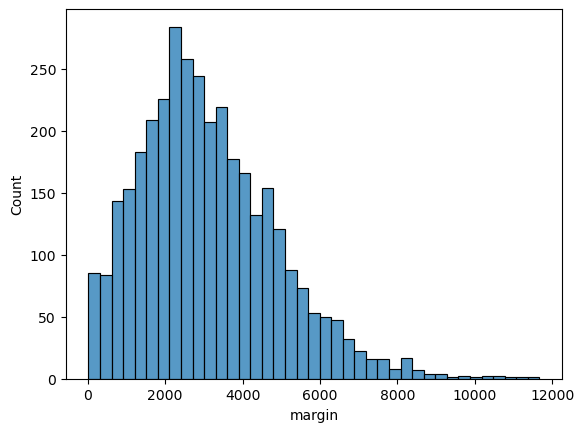

In [440]:
sbn.histplot(transaction_new['margin'])

In [443]:
np.percentile(transaction_new['margin'].describe(), 33)

2142.2954

In [446]:
np.percentile(transaction_new['margin'].describe(), 80)

3887.236000000001

In [453]:
def margin_creator(x):
    if x < 2200:
        return 'low'
    elif x < 4000 :
        return 'medium'
    else:
        return 'high'

In [464]:
transaction_new['margin_call'] = transaction_new['margin'].apply(margin_creator)

In [465]:
transaction_new

,customer_id,margin,margin_call
0,1,3018.090000,medium
1,2,2226.260000,medium
2,3,3362.810000,medium
3,4,220.570000,low
4,5,2394.940000,medium
...,...,...,...
3488,3497,1648.320000,low
3489,3498,3147.330000,medium
3490,3499,4955.250000,high
3491,3500,1785.860000,low


# Merging all tables to a final dataset

In [468]:
final = new_cust_dem_add.merge(transaction_new, how='inner', on = 'customer_id')

In [469]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3410 entries, 0 to 3409
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3410 non-null   int64  
 1   gender                               3410 non-null   object 
 2   past_3_years_bike_related_purchases  3410 non-null   int64  
 3   wealth_segment                       3410 non-null   object 
 4   owns_car                             3410 non-null   object 
 5   tenure                               3410 non-null   float64
 6   age                                  3410 non-null   float64
 7   purc/tenure                          3410 non-null   float64
 8   age_bkt                              3410 non-null   object 
 9   postcode                             3410 non-null   object 
 10  state                                3410 non-null   object 
 11  property_valuation            

In [471]:
final = final.drop(columns = ['customer_id'])

In [473]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3410 entries, 0 to 3409
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               3410 non-null   object 
 1   past_3_years_bike_related_purchases  3410 non-null   int64  
 2   wealth_segment                       3410 non-null   object 
 3   owns_car                             3410 non-null   object 
 4   tenure                               3410 non-null   float64
 5   age                                  3410 non-null   float64
 6   purc/tenure                          3410 non-null   float64
 7   age_bkt                              3410 non-null   object 
 8   postcode                             3410 non-null   object 
 9   state                                3410 non-null   object 
 10  property_valuation                   3410 non-null   object 
 11  pur/age                       

In [474]:
final_class = final.drop(columns = ['margin'])
final_regg = final.drop(columns = ['margin_call'])


In [506]:
final_class['gender'].replace({'Female': 0, 'Male':1}, inplace = True)

In [511]:
final_class['wealth_segment'].replace({'Mass Customer': 1, 'High Net Worth': 2, 'Affluent Customer': 3}, inplace = True)

In [513]:
final_class['owns_car'].replace({'No': 0, 'Yes': 1}, inplace = True)

In [520]:
final_class['age_bkt'].replace({'20s':1,'30s':2,'40s':3,'50s':4,'60+':5},inplace = True)

In [522]:
final_class['postcode'] = pd.to_numeric(final_class['postcode'])

In [524]:
final_class['property_valuation'] = pd.to_numeric(final_class['property_valuation'])

In [526]:
final_class['state'].unique()

array(['NSW', 'QLD', 'VIC'], dtype=object)

In [527]:
final_class['state'].replace({'NSW':1, 'QLD': 2, 'VIC':3},inplace = True)

In [528]:
final_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3410 entries, 0 to 3409
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               3410 non-null   int64  
 1   past_3_years_bike_related_purchases  3410 non-null   int64  
 2   wealth_segment                       3410 non-null   int64  
 3   owns_car                             3410 non-null   int64  
 4   tenure                               3410 non-null   float64
 5   age                                  3410 non-null   float64
 6   purc/tenure                          3410 non-null   float64
 7   age_bkt                              3410 non-null   int64  
 8   postcode                             3410 non-null   int64  
 9   state                                3410 non-null   int64  
 10  property_valuation                   3410 non-null   int64  
 11  pur/age                       

In [595]:
final_class1 = final_class.drop(columns = ['purc/tenure','postcode','pur/age','age_bkt'])

In [618]:
final_class1

,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,age,state,property_valuation,margin_call
0,0,93,1,1,11.0,70.0,1,10,medium
1,1,81,1,1,16.0,43.0,1,10,medium
2,1,33,1,0,7.0,62.0,2,9,low
3,0,56,3,1,8.0,46.0,1,4,medium
4,1,35,2,1,13.0,57.0,3,9,medium
...,...,...,...,...,...,...,...,...,...
3405,1,99,1,1,19.0,37.0,1,9,low
3406,0,73,3,1,18.0,37.0,3,5,low
3407,0,28,1,0,5.0,28.0,3,4,medium
3408,1,29,1,1,7.0,44.0,2,9,high


# Model training - Classification

In [475]:
from sklearn.model_selection import train_test_split

In [476]:
from sklearn.tree import DecisionTreeClassifier

In [665]:
X = final_class1.drop(columns = ['margin_call']).values
y = final_class1['margin_call'].values

In [666]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y,test_size = .50, random_state= 500)

In [667]:
X_val, X_test,y_val,y_test = train_test_split(X_rem,y_rem,test_size = .50,random_state= 400)

In [668]:
classifier = DecisionTreeClassifier(max_depth = 100,min_samples_split = 7)

In [669]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=100, min_samples_split=7)

In [670]:
classifier.score(X_train,y_train)

0.8193548387096774

In [671]:
classifier.score(X_val,y_val)

0.3532863849765258

In [672]:
classifier.score(X_test,y_test)

0.3481828839390387

In [673]:
X_val

array([[ 1., 20.,  1., ..., 32.,  3.,  5.],
       [ 1., 64.,  3., ..., 64.,  1., 11.],
       [ 1., 36.,  2., ..., 31.,  1.,  2.],
       ...,
       [ 1., 19.,  3., ..., 23.,  1., 10.],
       [ 0.,  2.,  1., ..., 45.,  3.,  6.],
       [ 0., 24.,  2., ..., 53.,  2.,  5.]])

In [674]:
X_val.shape

(852, 8)

In [675]:
X_train.shape

(1705, 8)

## random forest

In [676]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [677]:
rf_classifier.score(X_val, y_val)

0.3380281690140845

In [678]:
rf_classifier.score(X_train, y_train)

1.0

In [679]:
rf_classifier.score(X_test, y_test)

0.3716295427901524

In [683]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=300, random_state=42)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=300, random_state=42)

In [684]:
gb_classifier.score(X_train, y_train)

0.7501466275659824

In [685]:
rf_classifier.score(X_val, y_val)

0.3380281690140845

In [688]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train a Gradient Boosting classifier with early stopping
gb_classifier = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, random_state=42, n_iter_no_change=10, tol=0.01)
gb_classifier.fit(X_train, y_train)

# Evaluate the Gradient Boosting on the test set
print("Gradient Boosting - Test Accuracy:", gb_classifier.score(X_test, y_test))


Gradient Boosting - Test Accuracy: 0.37280187573270807


In [689]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest classifier with max_features regularization
rf_classifier = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the Random Forest on the validation and test sets
print("Random Forest - Validation Accuracy:", rf_classifier.score(X_val, y_val))
print("Random Forest - Test Accuracy:", rf_classifier.score(X_test, y_test))


Random Forest - Validation Accuracy: 0.3380281690140845
Random Forest - Test Accuracy: 0.3716295427901524


In [690]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = final_class1.drop(columns = ['margin_call']).values
y = final_class1['margin_call'].values

# Splitting the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features for better performance in neural networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create and train a Neural Network classifier
nn_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
nn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_val_pred = nn_classifier.predict(X_val_scaled)

# Evaluate the Neural Network on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
report_val = classification_report(y_val, y_val_pred)

print("Neural Network - Validation Accuracy:", accuracy_val)
print("Classification Report (Validation):\n", report_val)

# Make predictions on the test set
y_test_pred = nn_classifier.predict(X_test_scaled)

# Evaluate the Neural Network on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
report_test = classification_report(y_test, y_test_pred)

print("Neural Network - Test Accuracy:", accuracy_test)
print("Classification Report (Test):\n", report_test)


Neural Network - Validation Accuracy: 0.31702544031311153
Classification Report (Validation):
               precision    recall  f1-score   support

        high       0.24      0.25      0.24       137
         low       0.33      0.33      0.33       177
      medium       0.36      0.36      0.36       197

    accuracy                           0.32       511
   macro avg       0.31      0.31      0.31       511
weighted avg       0.32      0.32      0.32       511

Neural Network - Test Accuracy: 0.3671875
Classification Report (Test):
               precision    recall  f1-score   support

        high       0.33      0.34      0.33       128
         low       0.38      0.38      0.38       190
      medium       0.38      0.37      0.37       194

    accuracy                           0.37       512
   macro avg       0.36      0.36      0.36       512
weighted avg       0.37      0.37      0.37       512



# I tried. but thats all i can get to !